In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

#converting the values to float
x_train, x_test = np.array(x_train,np.float32), np.array(x_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train/255. , x_test/255.

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [4]:
y_test.shape, y_train.shape

((10000,), (60000,))

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

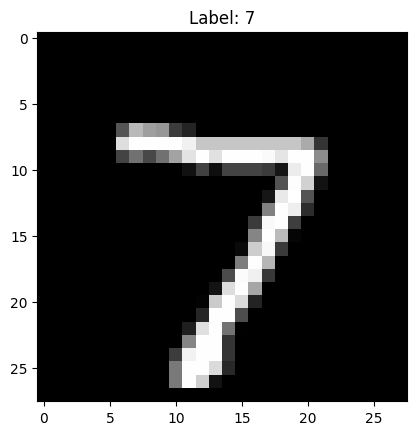

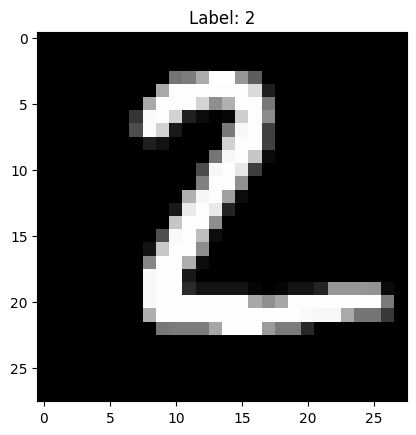

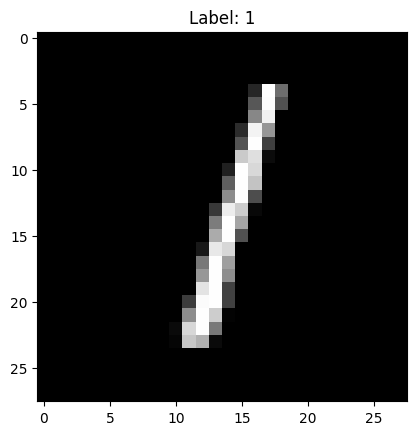

In [6]:
for i in range(3):
  plt.title(f"Label: {y_test[i]}")
  plt.imshow(x_test[i], cmap='gray')
  plt.show()

In [8]:
model = keras.Sequential([

    keras.layers.Flatten(input_shape = (28,28)),

    keras.layers.Dense(units = 128, activation = tf.nn.relu ),

    keras.layers.Dense(units = 128, activation = tf.nn.relu),

    keras.layers.Dense(units = 10, activation = tf.nn.softmax )




])

In [9]:
sample = x_test[i]
print('Sample shape before:', sample.shape)
sample = np.expand_dims(sample, 0)
print('Sample shape after:', sample.shape)

Sample shape before: (28, 28)
Sample shape after: (1, 28, 28)


In [10]:
pred_b4_training = model.predict(sample)
print(pred_b4_training)
print('\n Prediction before Training:', np.argmax(pred_b4_training))

1/1 [==============================] - 0s 155ms/step
[[0.12530513 0.09710041 0.12110822 0.07162956 0.11746084 0.09565199
  0.07819888 0.08774287 0.09771    0.10809202]]

 Prediction before Training: 0


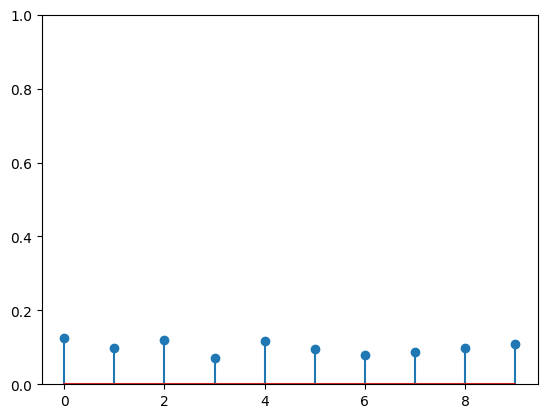

In [11]:
plt.stem(np.arange(10), pred_b4_training[0])
plt.ylim(0,1)
plt.show()

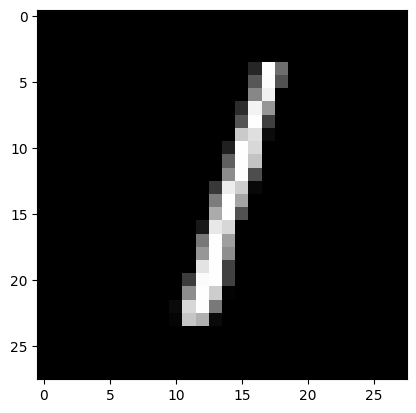

In [12]:
plt.imshow(sample[0], cmap='gray')
plt.show()

In [13]:
sum(np.array(pred_b4_training)[0])

0.999999925494194

In [15]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [17]:
hist = model.fit(x_train, y_train, epochs = 50, callbacks=[tensorboard_callback])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5364 - sparse_categorical_accuracy: 0.8619
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2368 - sparse_categorical_accuracy: 0.9327
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1865 - sparse_categorical_accuracy: 0.9475
Epoch 4/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1544 - sparse_categorical_accuracy: 0.9563
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9625
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1148 - sparse_categorical_accuracy: 0.9674
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1014 - sparse_categorical_accuracy: 0.9712
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0901 - sparse_categorical_accuracy: 0.9742
Epoch 9/50
1875/1875 [======

In [19]:
pred_after_training = model.predict(sample)
print(pred_after_training)
print('\n Prediction after Training:', np.argmax(pred_after_training))

1/1 [==============================] - 0s 60ms/step
[[3.4061476e-09 9.9995863e-01 9.7337704e-07 1.6965554e-10 1.4856063e-06
  1.0180189e-09 1.1619270e-05 9.4957149e-06 1.7716238e-05 1.4735229e-11]]

 Prediction after Training: 1


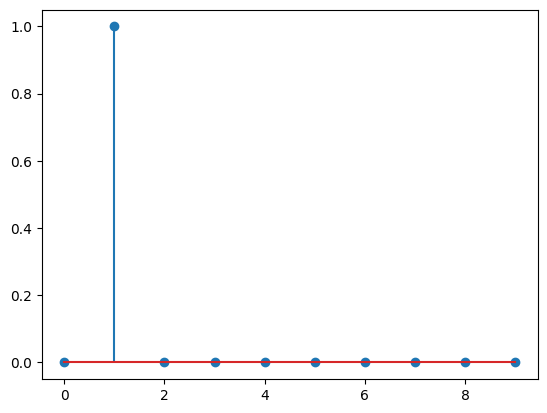

In [20]:
plt.stem(np.arange(10), pred_after_training[0])
plt.show()

In [23]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 3ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9777
test loss, test acc: [0.10677558928728104, 0.9776999950408936]
